In [1]:
# This is a python block

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# Cargo los Datos

In [4]:
df = pd.read_csv('./dataset_clean.csv', index_col=[0])

- elimino el descriptor a por leakage

In [5]:
df.drop(columns = ["a [ang]"], axis=[1], inplace = True)
df.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Vacancy energy (log[eV/O atom])', 'Magnetic moment (^2[mu_B])',
       'Valence B_1', 'Valence B_2', 'Valence B_3', 'Valence B_4',
       'Valence B_5', 'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 0 to 5328
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lowest distortion                5263 non-null   int64  
 1   A                                5263 non-null   int64  
 2   B                                5263 non-null   int64  
 3   Radius A [ang]                   5263 non-null   float64
 4   Radius B [ang]                   5263 non-null   float64
 5   Formation energy [eV/atom]       5263 non-null   float64
 6   Stability [eV/atom]              5263 non-null   float64
 7   Volume per atom [A^3/atom]       5263 non-null   float64
 8   Band gap [eV]                    5263 non-null   float64
 9   Vacancy energy [eV/O atom]       4914 non-null   float64
 10  Stability (log[eV/atom])         4981 non-null   float64
 11  Vacancy energy (log[eV/O atom])  2096 non-null   float64
 12  Magnetic moment (^2[

# Prepocesamiento

- Resuelvo problemas con descriptores que tienen infinitos

In [7]:
filter = df['Vacancy energy (log[eV/O atom])'] == -np.inf
df['Vacancy energy (log[eV/O atom])'][filter] = np.nan

/tmp/ipykernel_1237/1774103811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vacancy energy (log[eV/O atom])'][filter] = np.nan


In [8]:
filter = df['Stability (log[eV/atom])'] == -np.inf
df['Stability (log[eV/atom])'][filter] = np.nan

/tmp/ipykernel_1237/4054084434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stability (log[eV/atom])'][filter] = np.nan


- nulos 

In [9]:
df.isnull().sum()

Lowest distortion                     0
A                                     0
B                                     0
Radius A [ang]                        0
Radius B [ang]                        0
Formation energy [eV/atom]            0
Stability [eV/atom]                   0
Volume per atom [A^3/atom]            0
Band gap [eV]                         0
Vacancy energy [eV/O atom]          349
Stability (log[eV/atom])            290
Vacancy energy (log[eV/O atom])    3169
Magnetic moment (^2[mu_B])          947
Valence B_1                           0
Valence B_2                           0
Valence B_3                           0
Valence B_4                           0
Valence B_5                           0
Valence B_element not in BV           0
Valence B_not balanced                0
dtype: int64

In [10]:
df.drop('Vacancy energy (log[eV/O atom])', axis=1, inplace= True)

- elimino descriptor que presenta al menos un nulo

In [11]:
df.dropna(inplace=True)

- verifico

In [12]:
df.isnull().sum()

Lowest distortion              0
A                              0
B                              0
Radius A [ang]                 0
Radius B [ang]                 0
Formation energy [eV/atom]     0
Stability [eV/atom]            0
Volume per atom [A^3/atom]     0
Band gap [eV]                  0
Vacancy energy [eV/O atom]     0
Stability (log[eV/atom])       0
Magnetic moment (^2[mu_B])     0
Valence B_1                    0
Valence B_2                    0
Valence B_3                    0
Valence B_4                    0
Valence B_5                    0
Valence B_element not in BV    0
Valence B_not balanced         0
dtype: int64

# Split

In [13]:
#atributos(nodos)
x = df.drop('Lowest distortion', axis=1)

# variable obejtivo:
y = df['Lowest distortion']

- forma 

In [14]:
print(x.shape)
print(y.shape)

(3720, 18)
(3720,)


- Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)


In [16]:
print(X_train.shape)
print(X_test.shape)

(2976, 18)
(744, 18)


- Normalizacion

In [17]:
x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler
X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3720 entries, 0 to 5328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lowest distortion            3720 non-null   int64  
 1   A                            3720 non-null   int64  
 2   B                            3720 non-null   int64  
 3   Radius A [ang]               3720 non-null   float64
 4   Radius B [ang]               3720 non-null   float64
 5   Formation energy [eV/atom]   3720 non-null   float64
 6   Stability [eV/atom]          3720 non-null   float64
 7   Volume per atom [A^3/atom]   3720 non-null   float64
 8   Band gap [eV]                3720 non-null   float64
 9   Vacancy energy [eV/O atom]   3720 non-null   float64
 10  Stability (log[eV/atom])     3720 non-null   float64
 11  Magnetic moment (^2[mu_B])   3720 non-null   float64
 12  Valence B_1                  3720 non-null   int64  
 13  Valence B_2       

# Modelo

In [19]:
#from sklearn.tree import DecisionTreeClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

- Creo la instancia del modelo

In [20]:
modelTree=RandomForestClassifier(criterion="entropy",max_depth=10)
modelTree

RandomForestClassifier(criterion='entropy', max_depth=10)

- Entreno

In [21]:
modelTree.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

- Predigo

In [22]:
y_pred = modelTree.predict(X_test)

In [23]:
rl_predictions =modelTree.predict(X_test)

In [24]:
np.unique(y)

array([0, 1, 2, 3])

In [25]:
print(np.array(y_test))
print(np.array(rl_predictions))

[0 2 2 0 0 0 0 0 1 0 0 1 1 0 0 0 0 2 0 0 1 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 2 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 2 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 2
 0 0 0 0 1 0 1 0 3 0 2 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 0 0 0 0 0 1 1 1 2 1 0 0 1 0 0 0 0 0 0 0 3 1 2 0 0 2 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 0 0 1 1 2 1 0 0 3 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 2 2 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 0 2 0 1 0 0 0 0 1 2
 0 2 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 2 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 2 2 1 1 1 0 0 3 0 3 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 2 0 0
 1 0 1 1 1 1 2 2 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 1 0 0 0 1 0 1 0 0 2 

# Evaluación del modelo.

1. Coeficiente de correlacion de Matheus

In [26]:
from sklearn.metrics import matthews_corrcoef
coeficiente_mcc = matthews_corrcoef(y_test, y_pred)
coeficiente_mcc

0.8734861719702318

2.  accuracy 

In [27]:
from sklearn import metrics
from sklearn.metrics import (
    recall_score,
    confusion_matrix,
    precision_score,
    f1_score,
    accuracy_score,
    classification_report,
)

In [28]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       505
           1       0.84      0.97      0.90       189
           2       0.80      0.39      0.52        41
           3       0.86      0.67      0.75         9

    accuracy                           0.94       744
   macro avg       0.87      0.75      0.79       744
weighted avg       0.94      0.94      0.93       744



In [29]:
print("DecisionTrees's Accuracy: ",metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9395161290322581


In [30]:
from sklearn.tree import plot_tree

[Text(0.6916473765432098, 0.9545454545454546, 'Stability (log[eV/atom]) <= -0.024\nentropy = 1.231\nsamples = 1894\nvalue = [1977, 780, 171, 48]\nclass = 0'),
 Text(0.41878858024691357, 0.8636363636363636, 'Vacancy energy [eV/O atom] <= -0.098\nentropy = 1.151\nsamples = 661\nvalue = [54, 778, 164, 45]\nclass = 1'),
 Text(0.14660493827160495, 0.7727272727272727, 'Radius A [ang] <= -0.847\nentropy = 0.823\nsamples = 239\nvalue = [2, 298, 83, 1]\nclass = 1'),
 Text(0.07716049382716049, 0.6818181818181818, 'Stability [eV/atom] <= -0.971\nentropy = 1.098\nsamples = 83\nvalue = [2, 60, 67, 0]\nclass = 3'),
 Text(0.037037037037037035, 0.5909090909090909, 'Formation energy [eV/atom] <= 2.063\nentropy = 1.063\nsamples = 34\nvalue = [2, 37, 15, 0]\nclass = 1'),
 Text(0.030864197530864196, 0.5, 'Vacancy energy [eV/O atom] <= -1.125\nentropy = 0.867\nsamples = 32\nvalue = [0, 37, 15, 0]\nclass = 1'),
 Text(0.012345679012345678, 0.4090909090909091, 'Stability (log[eV/atom]) <= -0.884\nentropy = 0.

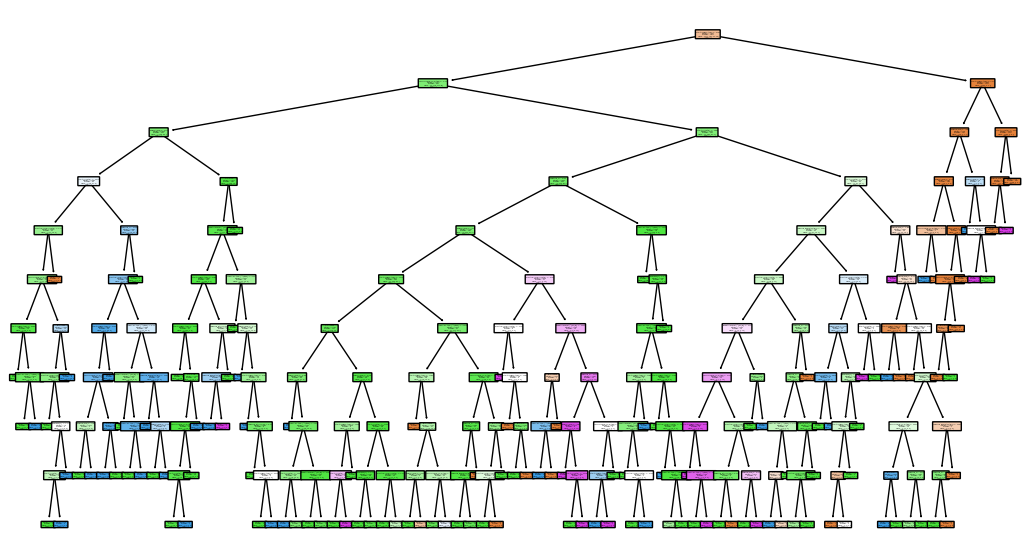

In [31]:
fig = plt.figure(figsize=(13, 7))

#Saco los targets como una str cada elemento
str_targets = str(y.unique()).replace('[', '').replace(']', '').split(' ')

plot_tree(modelTree.estimators_[0], feature_names=x.columns, class_names=str_targets, filled=True, impurity=True, rounded=True)

- Matriz de confusión

In [33]:
from sklearn.metrics import confusion_matrix

# target
categoricalTarget = ['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal']
numericalTarget = list(range(0,4))

y_test.replace(numericalTarget,categoricalTarget, inplace = True)
y_pred = pd.Series(y_pred)
y_pred.replace(numericalTarget,categoricalTarget, inplace = True)

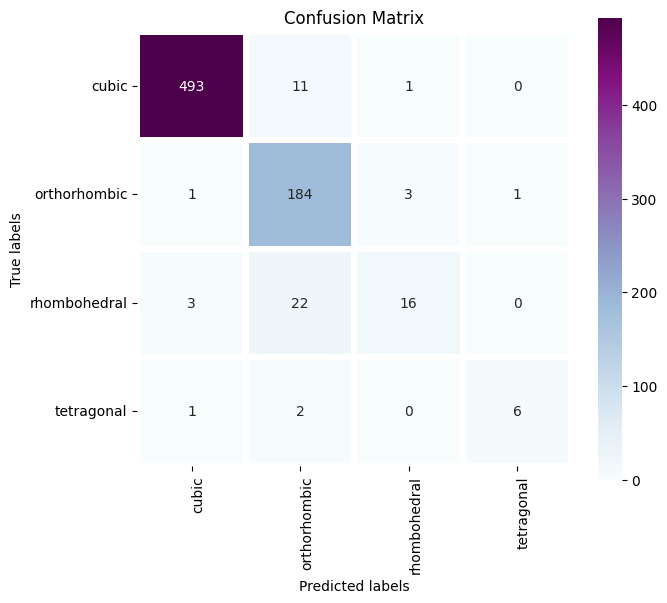

In [34]:
import seaborn as sns
f, ax= plt.subplots()

sns.heatmap(
    confusion_matrix(list(y_test), list(y_pred)), annot=True, fmt="d",square=True, cmap='BuPu', linewidths=3,  ax=ax
)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(categoricalTarget)
ax.yaxis.set_ticklabels(categoricalTarget);

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=00, ha="right",
         rotation_mode="anchor")

f.set_figheight(6)
f.set_figwidth(7)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>